2ая лаба

In [446]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from distribution_func import DistributionFunc

загружаем данные

In [447]:
# import pandas as pd

# df = pd.read_excel('Вдовин Игорь.xlsx')

In [448]:
df = pd.read_csv('Вдовин Игорь.csv')
df = df['sample']
df

0         -8.999013
1         -0.756722
2         -7.749841
3          1.324729
4         -4.786801
            ...    
999995    -8.994960
999996    -7.607251
999997     4.092682
999998    14.170163
999999    -3.299861
Name: sample, Length: 1000000, dtype: float64

максимальное и минимальное значение, чтобы понять, приблизительный интервал t.Еще отсортируем за компанию, мб пригодиться потом

In [449]:
df = sorted(df)
df[0], df[999999]

(-9.49999352708713, 80.7752298790279)

построим плотность. Принцип похож на инфинитизимальный подход. Делим отрезок, где лежат атомы распределения на маленькие отрезки (bins). Считаем сколько попало точек в каждый отрезок (counts). Строим гистограмму и соединяем. bins = 50, так как иначе все сливается, получается не очень наглядно

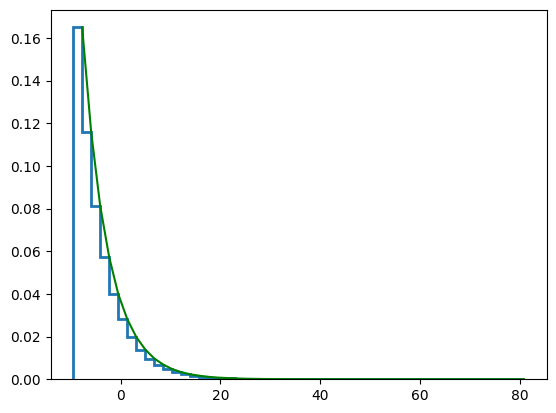

In [450]:
counts, bins = np.histogram(df, bins = 50, density = True)

plt.stairs(counts, bins, linewidth = 2)
# bins = bins[1:]
# plt.plot(counts, bins, color = 'red')
plt.plot(bins[1:], counts, color = 'green')


Вот тут увидел ссылку в лабе на штуку, которая строит эмпирическую функцию распределения. У меня получилось похоже

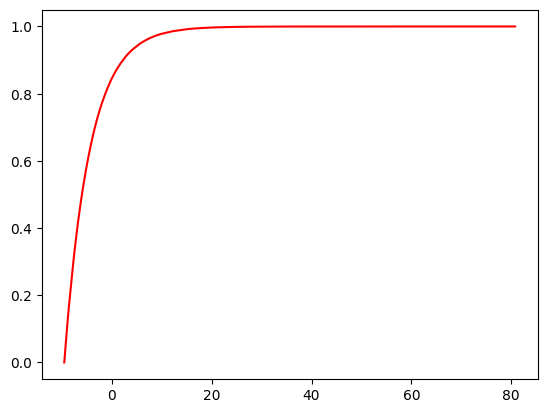

In [451]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(df)
ecdf(1)
plt.plot(df, ecdf(df), color = 'red')

Построим эмпирическую функцию распределения. Тут также стоит использовать

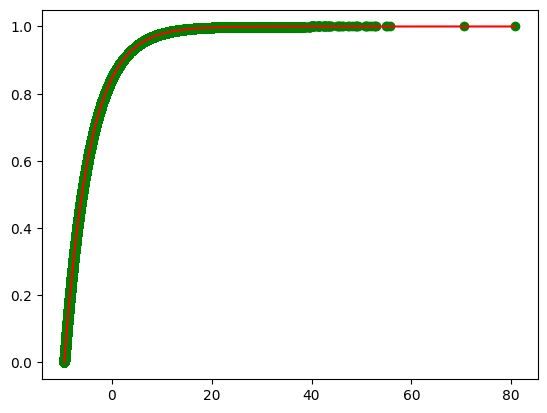

In [452]:
y_axis = np.array([count * 1/len(df) + 1/len(df) for count in range(len(df))])

y_axis
plt.plot(df, y_axis, color = 'red')
plt.scatter(df, y_axis, color = 'green')

Посмотрев на графики плотности и функции распределения, могу предположить, что передо мной показательное распределение. При том смещенное по оси x, где-то на минимальное значение, то <span style='color:Blue'> есть бэта равен -9.5  </span>. Функция распределения, по моему предположению, должна выглядеть так: 
<img src="density.png" style="width:1000px;height:400px;">
У меня нет идей как искать альфа. Тыкаем в небо. Мне нравится число 5. Будет 5). <span style='color:red'> есть альфа равен 5  </span>. На самом деле, я подобрал его по критерию Колмогорова, чтобы там pvalue было +- стабильное

Теперь применим Критерий Колмогорова


In [453]:
from scipy.stats import kstest
from scipy import stats
x = stats.expon(loc = -9.5, scale = 5).rvs(1000)


kstest(df, x)

KstestResult(statistic=0.02785299999999999, pvalue=0.41294912849547594, statistic_location=-8.461313976014324, statistic_sign=-1)

Не нашел как в прямо в kstest сравнить со случайной величиной. Так как показательное со смещением там работает странно и выдает pvalue = nan или очень маленькому числу. Поэтому я сгенерировал случайную величину с предполагаемыми параметрами, и, если, верить интернету, то pvalue = 0.45 - хорошее и нуль-гипотеза нормальная. Только из-за этого (из-за того, что я генерю случайную величину) её значения скачут, так что вместо 0.45 может быть другая тоже высокая цифра. Максимальное значение, которое я поймал было 0,96

Задание 2

Возьмем ОММ и ОМП из соответствующих номеров (3.10, 4.9). 
ОМП:
$\newline$
$\alpha = \overline{X} - X_{(1)} $, $\beta = X_{(1)}$
ОММ:
$\newline$
$\alpha = \sqrt[2]{\overline{X^2} - \overline{X}^2} - X_{(1)}$, $\beta = \overline{X} - \alpha$

In [454]:
# def MLE(samples):
#     if samples > 

In [455]:
# from scipy.optimize import minimize

#MLE - Most likelyhood estimation 
def alpha_MLE(df):
    return np.sum(df)/len(df) - np.min(df)
def beta_MLE(df):
    return np.min(df)
alpha_MLE1 = alpha_MLE(df)
beta_MLE1 = beta_MLE(df)

alpha_MLE1, beta_MLE1

(5.103284474883538, -9.49999352708713)

In [456]:
import numpy as np
np.exp(-np.pi)

0.04321391826377225

Оценка метода моментов

In [457]:
def alpha_MoM(df):
    return np.sqrt(np.sum(np.power(df, 2))/len(df) -np.power(np.sum(df)/len(df), 2) )
def beta_MoM(df):
    return np.sum(df)/len(df) - alpha_MoM(df)
alpha_MoM1 = np.sqrt(np.sum(np.power(df, 2))/len(df) -np.power(np.sum(df)/len(df), 2) )
beta_MoM1 = sum(df)/len(df) - alpha_MoM1
alpha_MoM1, beta_MoM1

(5.104294166102866, -9.501003218306483)

Прикольное замечание - если поставить в этих функциях вместо np.sum просто sum, то код, который будет выполняться на 2 ячейки ниже снизу (там где считаем значения оценок, убирая значения из выборки по 100). Будет выполняться более чем за 3 минуты (я недождался, отключил). А так за 35.2 секунды

Задание 3

При обрезании выборки, мне будет мешать отсортированность значений. Поэтому я опять делаю их не отсортированными

In [458]:
df = pd.read_csv('Вдовин Игорь.csv')['sample']

Отрезаем по 100 значений. Было и по 10, но оно считалось по 7 минут. А ощутимой разницы не было, поэтому я убрал

In [459]:
alpha_scores_MLE = []
beta_scores_MLE = []
alpha_scores_MoM = []
beta_scores_MoM = []
values_lengths = []

for i in range(999999, 100000, -100):
    temp_df = df[:i]
    alpha_scores_MLE.append(alpha_MLE(temp_df))
    beta_scores_MLE.append(beta_MLE(temp_df))
    alpha_scores_MoM.append(alpha_MoM(temp_df))
    beta_scores_MoM.append(beta_MoM(temp_df))
    values_lengths.append(len(temp_df))

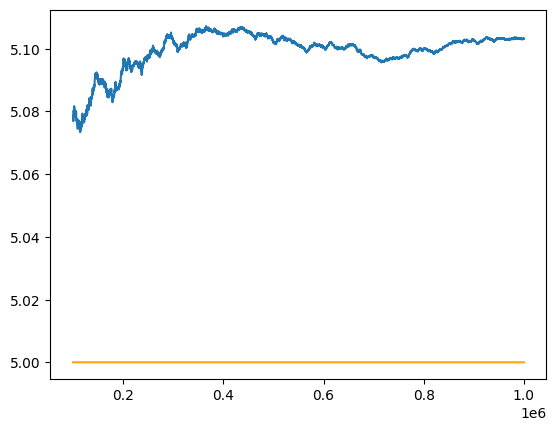

In [460]:
plt.plot(values_lengths, alpha_scores_MLE)
plt.plot(values_lengths, [5]*len(values_lengths), color = 'orange', linestyle = '-')

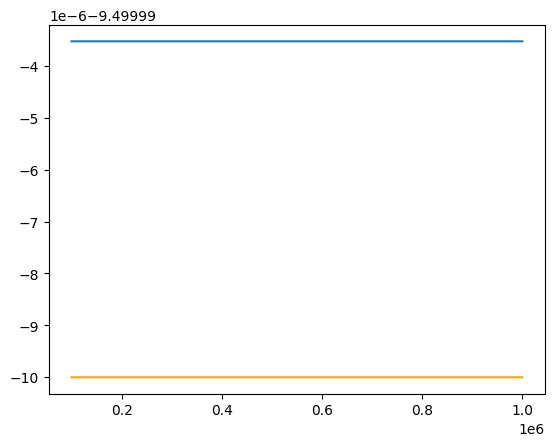

In [461]:
plt.plot(values_lengths, beta_scores_MLE)
plt.plot(values_lengths, [-9.5] * len(values_lengths), color = 'orange', linestyle = '-')

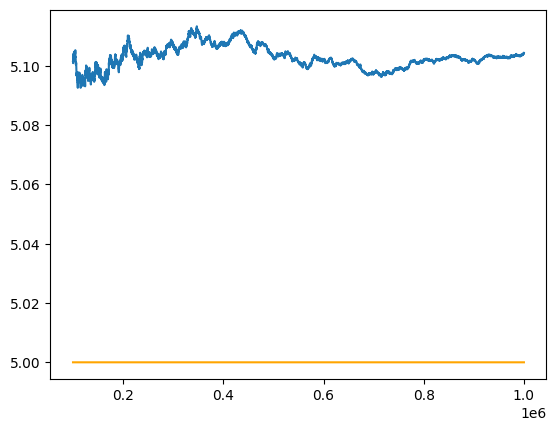

In [462]:
plt.plot(values_lengths, alpha_scores_MoM)
plt.plot(values_lengths, [5]*len(values_lengths), color = 'orange', linestyle = '-')

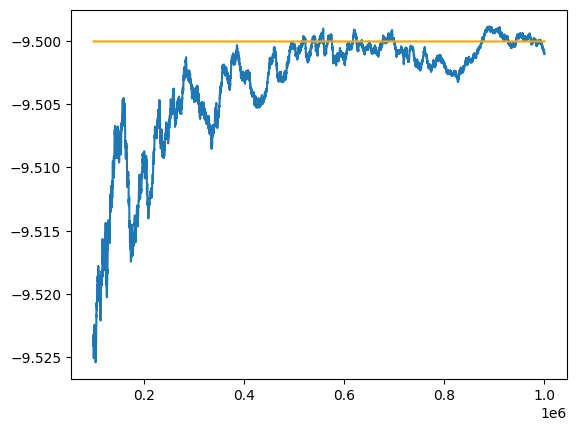

In [463]:
plt.plot(values_lengths, beta_scores_MoM)
plt.plot(values_lengths, [-9.5] * len(values_lengths), color = 'orange', linestyle = '-')

Отрезаем по 1000 значений

In [464]:
alpha_scores_MLE = []
beta_scores_MLE = []
alpha_scores_MoM = []
beta_scores_MoM = []
values_lengths = []

for i in range(999999, 100000, -1000):
    temp_df = df[:i]
    alpha_scores_MLE.append(alpha_MLE(temp_df))
    beta_scores_MLE.append(beta_MLE(temp_df))
    alpha_scores_MoM.append(alpha_MoM(temp_df))
    beta_scores_MoM.append(beta_MoM(temp_df))
    values_lengths.append(len(temp_df))

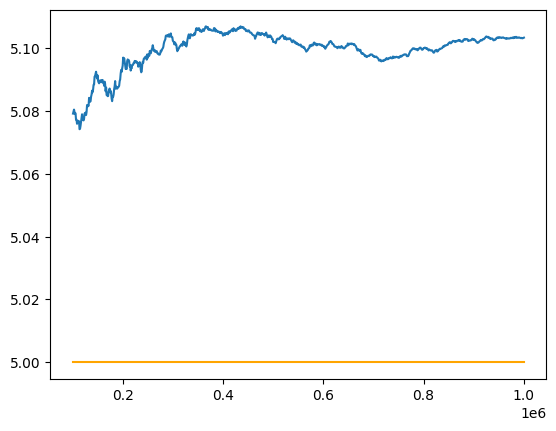

In [465]:
plt.plot(values_lengths, alpha_scores_MLE)
plt.plot(values_lengths, [5]*len(values_lengths), color = 'orange', linestyle = '-')

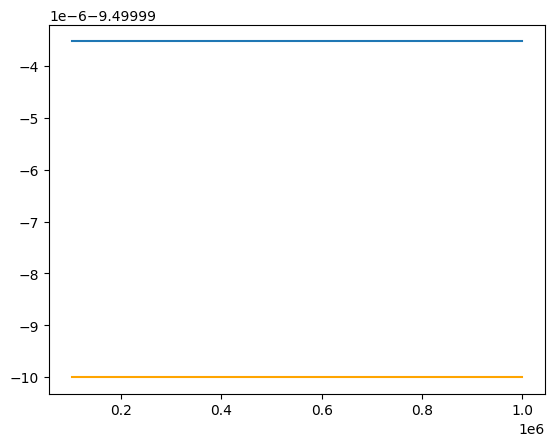

In [466]:
plt.plot(values_lengths, beta_scores_MLE)
plt.plot(values_lengths, [-9.5] * len(values_lengths), color = 'orange', linestyle = '-')


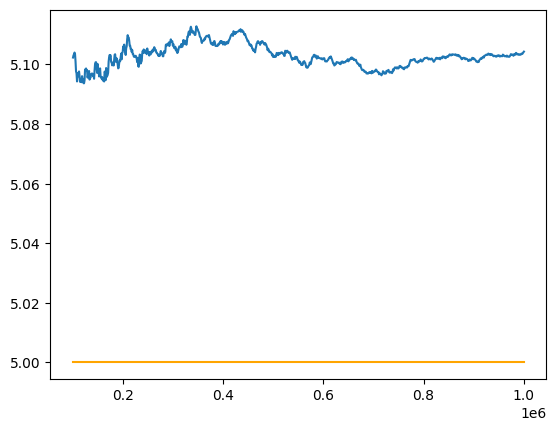

In [467]:
plt.plot(values_lengths, alpha_scores_MoM)
plt.plot(values_lengths, [5]*len(values_lengths), color = 'orange', linestyle = '-')

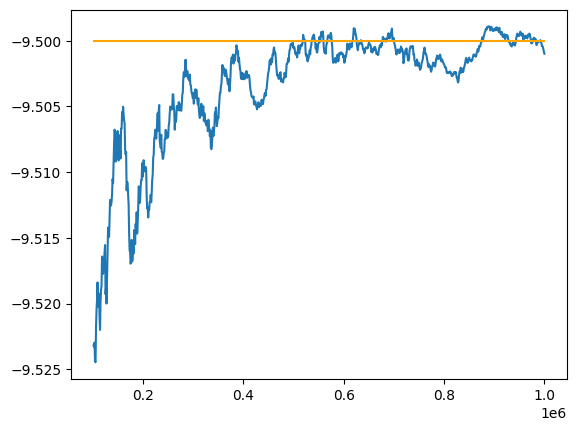

In [468]:
plt.plot(values_lengths, beta_scores_MoM)
plt.plot(values_lengths, [-9.5] * len(values_lengths), color = 'orange', linestyle = '-')

Ассимптотическая нормальность. Разбиваем выборку на $10^3$ выборок

In [469]:
values = []
prev = 0
for i in range(1000, len(df), 1000):
    values.append(df[prev:i])
    prev = i


Посмотрев на графики предущего пункта. Можно понять, что скорее всего beta всё-таки равна 5.1. Поэтому и дальше мы будем считать её 5.1

In [470]:
alpha = 5.1
beta = -9.5
sqrt_n = np.power(100, 1/3)

#1000 значений для каждого параметра
alpha_MLE_ass = sqrt_n * (np.array([alpha_MLE(i) for i in values]) - alpha)
beta_MLE_ass = sqrt_n * (np.array([beta_MLE(i) for i in values]) - beta)
alpha_MoM_ass = sqrt_n * (np.array([alpha_MoM(i) for i in values]) - alpha)
beta_MoM_ass = sqrt_n * (np.array([beta_MoM(i) for i in values]) - beta)

t_values = np.linspace(-4, 4, 1000)


Строим графики плотности и функции распределения для каждой случайной величины. Нагенеренных в прошлой ячейке

In [471]:
def stand_norm(t):
    return 1/np.power(2*np.pi, 0.5)*(np.exp(-0.5* t**2))

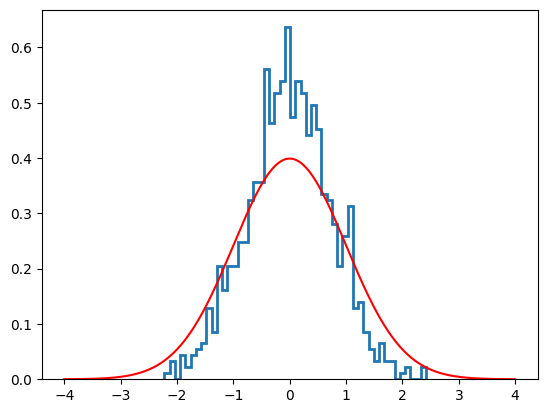

In [472]:

counts, bins = np.histogram(alpha_MLE_ass, bins = 50, density=True)
plt.stairs(counts, bins, linewidth = 2)
plt.plot(t_values, stand_norm(t_values), color = 'red')


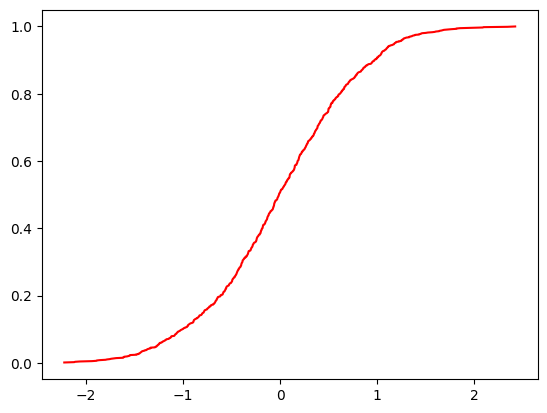

In [473]:
temp = sorted(alpha_MLE_ass)
ecdf = ECDF(temp)
ecdf(1)
plt.plot(temp, ecdf(temp), color = 'red')

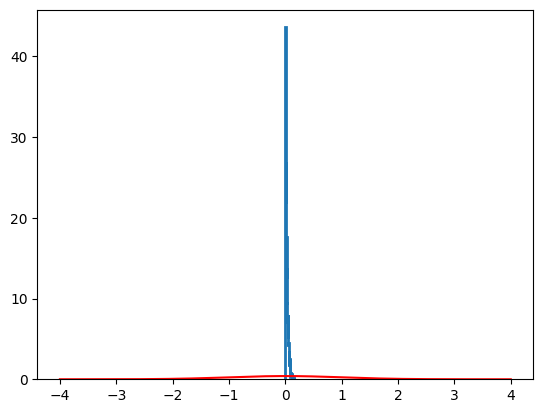

In [474]:
counts, bins = np.histogram(beta_MLE_ass, bins = 50, density = True)
plt.stairs(counts, bins, linewidth = 2)
plt.plot(t_values, stand_norm(t_values), color = 'red')

Эта оценка явно не ассимптотически нормальная

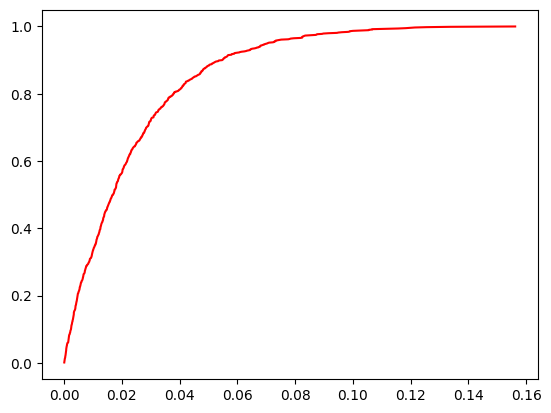

In [475]:
temp = sorted(beta_MLE_ass)
ecdf = ECDF(temp)
ecdf(1)
plt.plot(temp, ecdf(temp), color = 'red')

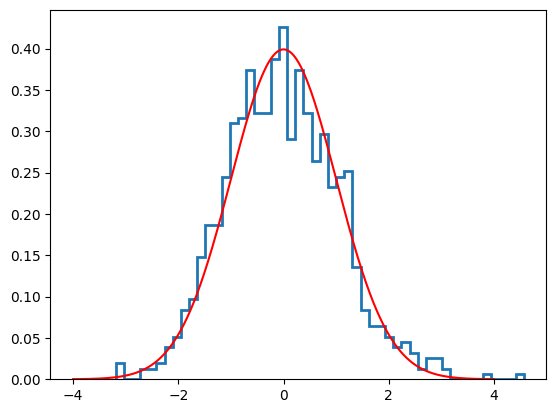

In [476]:
counts, bins = np.histogram(alpha_MoM_ass, bins = 50, density=True)
plt.stairs(counts, bins, linewidth = 2)
plt.plot(t_values, stand_norm(t_values), color = 'red')

0.8538538538538538

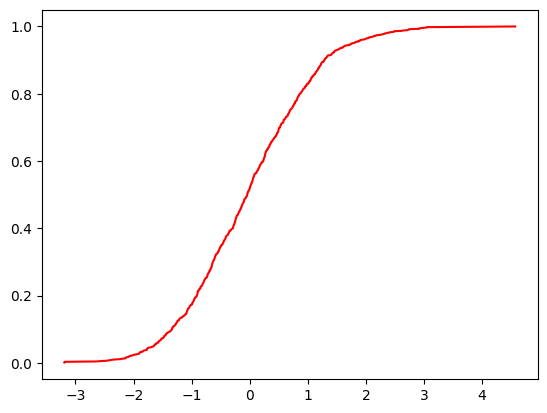

In [477]:
temp = sorted(alpha_MoM_ass)
ecdf = ECDF(temp)
ecdf(1)
plt.plot(temp, ecdf(temp), color = 'red')
ecdf(1.1)

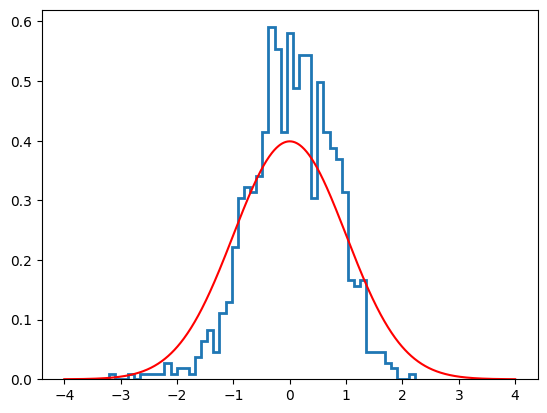

In [478]:
counts, bins = np.histogram(beta_MoM_ass, bins = 50, density=True)
plt.stairs(counts, bins, linewidth = 2)
plt.plot(t_values, stand_norm(t_values), color = 'red')

0.9189189189189189

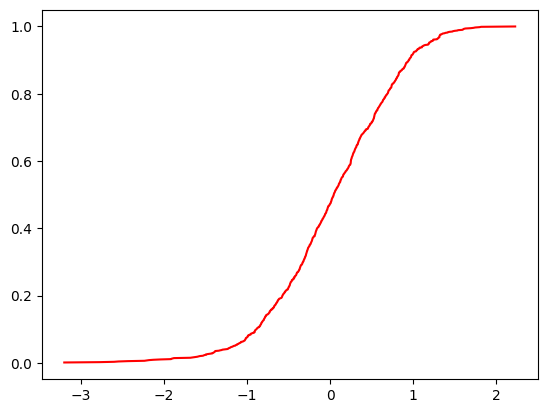

In [479]:
temp = sorted(beta_MoM_ass)
ecdf = ECDF(temp)

plt.plot(temp, ecdf(temp), color = 'red')
ecdf(1)

Вывод: все, кроме второй оценки (ОМП для бэта) являются ассимптотически нормальными. Найдем коэффициент ассимптотической нормальности и дисперсию. Для всех, кроме 2ой оценки

In [480]:
import statistics

disp_alpha_MLE = statistics.variance(alpha_MLE_ass)
disp_alpha_MoM = statistics.variance(alpha_MoM_ass)
disp_beta_MoM = statistics.variance(beta_MoM_ass)
disp_alpha_MLE, disp_alpha_MoM, disp_beta_MoM

(0.5570191881963723, 1.131064828016197, 0.54575561613658)

Вот эти значения очень похожи на коэффициенты АНО

Теперь из номера 7.21 берем коэффициенты ассимптотической нормальности для ОММ и ОМП

In [481]:
norm_koef_beta_MoM = alpha ** 2
norm_koef_alpha_MoM = 2* alpha ** 2
norm_koef_alpha_MLE = alpha**2
#бэта не АНО
norm_koef_alpha_MoM, norm_koef_alpha_MLE, norm_koef_beta_MoM, np.sqrt(disp_alpha_MLE)

(52.019999999999996,
 26.009999999999998,
 26.009999999999998,
 0.7463371813037136)

А вот это ну совсем не похоже на правду. Поэтому я сделаю трюк и скажу, что по определению, коэффициент ассимптотической нормальности равен дисперсии нормального распределения, которую мы посчитали выше. А почему они не совпали, у меня нет идей. Но значение $\sigma(\theta^*)$ нам известно, это корень из дисперсий. Воспользуемся им для следующего номера

4 задание

найдем квантили для двух эпсилонов. Просто подберем значения, через функцию ecdf, руками. Это будут квантили уровня 0.975

In [507]:
temp = sorted(alpha_MLE_ass)
ecdf = ECDF(temp)

kvant_alpha_MLE = 1.4
ecdf(kvant_alpha_MLE)

0.974974974974975

In [508]:
temp = sorted(alpha_MoM_ass)
ecdf = ECDF(temp)

kvant_alpha_MoM = 2.25
ecdf(kvant_alpha_MoM)

0.974974974974975

In [509]:
temp = sorted(beta_MoM_ass)
ecdf = ECDF(temp)

kvant_beta_MoM = 1.33
ecdf(kvant_beta_MoM)

0.975975975975976

Теперь для каждой оценки построим ассимптотический доверительный интервал уровня доверия 0.95

In [510]:
sqrt_n = np.sqrt(len(df))
left_border_alpha_MLE = alpha_MLE1 - kvant_alpha_MLE * np.sqrt(disp_alpha_MLE) / sqrt_n
right_border_alpha_MLE = alpha_MLE1 + kvant_alpha_MLE * np.sqrt(disp_alpha_MLE) / sqrt_n
left_border_alpha_MLE, right_border_alpha_MLE

(5.102239602829713, 5.104329346937363)

In [511]:
left_border_alpha_MoM = alpha_MoM1 - kvant_alpha_MoM * np.sqrt(disp_alpha_MoM) / sqrt_n
right_border_alpha_MoM = alpha_MoM1 + kvant_alpha_MoM * np.sqrt(disp_alpha_MoM) / sqrt_n
left_border_alpha_MoM, right_border_alpha_MoM

(5.101901256641179, 5.106687075564553)

In [512]:
left_border_beta_MoM = beta_MoM1 - kvant_beta_MoM * np.sqrt(disp_beta_MoM) / sqrt_n
right_border_beta_MoM = beta_MoM1 + kvant_beta_MoM * np.sqrt(disp_beta_MoM) / sqrt_n
left_border_beta_MoM, right_border_beta_MoM

(-9.501985759455435, -9.500020677157531)

Теперь ищем квантили для уровня 0.995

In [513]:
temp = sorted(alpha_MLE_ass)
ecdf = ECDF(temp)

kvant_alpha_MLE = 1.9
ecdf(kvant_alpha_MLE)

0.994994994994995

In [514]:
temp = sorted(alpha_MoM_ass)
ecdf = ECDF(temp)

kvant_alpha_MLE = 2.95
ecdf(kvant_alpha_MLE)

0.994994994994995

In [515]:
temp = sorted(beta_MoM_ass)
ecdf = ECDF(temp)

kvant_alpha_MLE = 1.7
ecdf(kvant_alpha_MLE)

0.994994994994995

Теперь построим ассимптотические доверительные интервалы для уровня 0.99

In [516]:
left_border_alpha_MLE = alpha_MLE1 - kvant_alpha_MLE * np.sqrt(disp_alpha_MLE) / sqrt_n
right_border_alpha_MLE = alpha_MLE1 + kvant_alpha_MLE * np.sqrt(disp_alpha_MLE) / sqrt_n
left_border_alpha_MLE, right_border_alpha_MLE

(5.102015701675322, 5.104553248091754)

In [517]:
left_border_alpha_MoM = alpha_MoM1 - kvant_alpha_MoM * np.sqrt(disp_alpha_MoM) / sqrt_n
right_border_alpha_MoM = alpha_MoM1 + kvant_alpha_MoM * np.sqrt(disp_alpha_MoM) / sqrt_n
left_border_alpha_MoM, right_border_alpha_MoM

(5.101901256641179, 5.106687075564553)

In [518]:
left_border_beta_MoM = beta_MoM1 - kvant_beta_MoM * np.sqrt(disp_beta_MoM) / sqrt_n
right_border_beta_MoM = beta_MoM1 + kvant_beta_MoM * np.sqrt(disp_beta_MoM) / sqrt_n
left_border_beta_MoM, right_border_beta_MoM

(-9.501985759455435, -9.500020677157531)